## Read in the Data

In [1]:
# Imports and colors and numbers that won't change
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
import scipy.stats as stats
#First year of data will not change, last year is not inclusive
min_data_year = 1880
max_data_year = 2025
female_color = 'xkcd:pink'
male_color = 'xkcd:light blue'
default_color = 'xkcd:periwinkle'
default_color2 = 'xkcd:grass green'
colors = ['xkcd:red','xkcd:orange','xkcd:mustard','xkcd:grass green', 'xkcd:light blue','xkcd:cerulean','xkcd:indigo', 
          'xkcd:lavender', 'xkcd:pink', 'xkcd:black', 'xkcd:tan', 'xkcd:grey blue']
generation_starts = {'Missionary' : 1880, 'Lost' : 1883, 'Greatest' : 1901, 'Silent' : 1928, 'Boomers' : 1946, 'Gen X' : 1965, 'Milennial' : 1981,
                     'Gen X' : 1997, 'Gen Alpha' : 2010, 'Gen Beta' : 2025}

In [2]:
# data = pd.DataFrame(columns = ['name', 'sex', 'total_count'] + [str(year) for year in range(1880, 2025)])
# for i in range(min_data_year, max_data_year):
#     current_df = pd.read_csv("names/yob"+str(i)+".txt", delimiter = ",", names = ['Name', 'Sex', 'Count'])
#     for index, row in current_df.iterrows():
#         current_name = row['Name']
#         current_sex = row['Sex']
#         current_count = row['Count']
#         current_year = str(i)
#         matches = (data['name'] == current_name) & (data['sex'] == current_sex)
#         if matches.any():
#             data.loc[matches, current_year] = current_count
#             data.loc[matches, 'total_count'] += current_count
#         else:
#             new_row = {col: 0 for col in data.columns}
#             new_row = {col: 0 for col in data.columns}
#             new_row['name'] = current_name
#             new_row['sex'] = current_sex
#             new_row[current_year] = current_count
#             new_row['total_count'] = current_count
#             data = pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

# data
# data.to_csv("SSANameData.txt")

In [2]:
data = pd.read_csv("SSANameData.txt")

## Methods

In [3]:
import functions as fun

## Graphs

### Single Name Graph
Give one name and the associated sex and a graph will be displayed of the number of babies of that sex given that name over time. The default range of years is 1880 to the most recent year, but can be changed. A single year is also  given, within the range, to print the specific count and rank for that year and to be displaayed on the graph.

the data ranges from 1880 to 2025


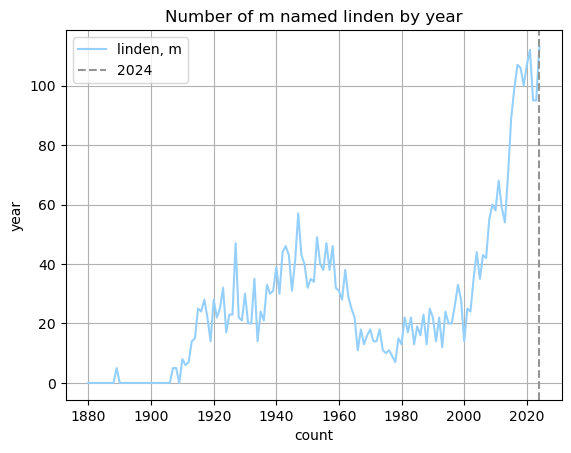

The first year with more than five of this name was 1889
The last year with more than five of this name was 2024
The name peaked in 2024 with 113
In 2024 there were 113 m babies given the name linden and its rank was 1548
There have been a total of 3972 babies named linden
The name increased from 1 to 113, a 11200.00% increase over 1880 to 2024


In [ ]:
name, sex = fun.name_input("name")
min_y, max_y = fun.year_input()
# min_y, max_y = fun.gens_years_input(generation_starts)
year = fun.single_year_input(min_y, max_y)
show = True
name_counts, ignore = fun.name_counts_years(name, sex, min_y, max_y)
earliest_year = fun.first_nonzero(name_counts, min_y)
latest_year = fun.last_nonzero(name_counts, min_y)

total_sum = int(sum(name_counts))
percent_change, initial, final = fun.calculate_percent_change(name_counts)
rank = fun.get_rank(name, sex, year)
change_verb = "increase" if percent_change > 0 else "decrease"
percent_change = abs(percent_change)
color = female_color if sex == 'f' else male_color
peak_count_year, peak_count = fun.peak_year(name_counts, min_y)
title = f"Number of {sex} named {name} by year"
label = f"{name}, {sex}"
fun.make_graph(title, range(min_y, max_y), name_counts, year, label, color, True)
plt.show()

print(f"The first year with more than five of this name was {earliest_year}")
print(f"The last year with more than five of this name was {latest_year}")
print(f"The name peaked in {peak_count_year} with {peak_count}")
print(f"In {year} there were {int(name_counts[year - min_y])} {sex} babies given the name {name} and its rank was {rank}")
print(f"There have been a total of {total_sum} babies named {name}")
print(f"The name {change_verb}d from {initial} to {final}, a {percent_change:.2f}% {change_verb} over {min_y} to {max_y - 1}")

### Multiple Name Graph
Performs the same operations as above, but for multiple names and their associated sexes. The year range can be altered and a single year is given to be graphed, but no additional information is printed

the data ranges from 1880 to 2025


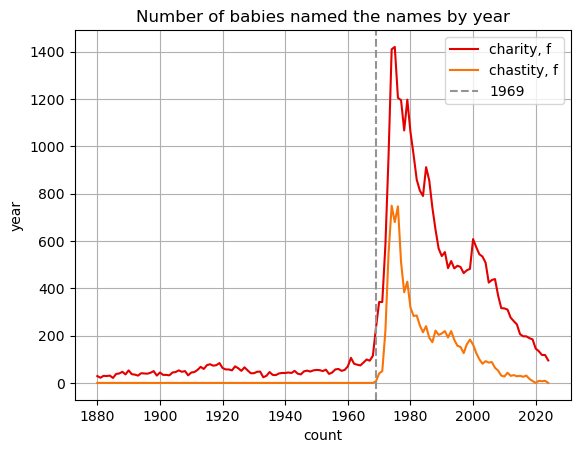

In [171]:
name_list, sex_list, year, min_y, max_y = fun.multiple_inputs()

color_index = 0

for i in range(len(name_list)):
    name_counts, ignore = fun.name_counts_years(name_list[i], sex_list[i], min_y, max_y)
    plt.plot(range(min_y, max_y), name_counts, color = colors[color_index], label = f"{name_list[i]}, {sex_list[i]}")
    if color_index == len(colors) - 1:
        color_index = 0
    else:
        color_index += 1

fun.format_graph("Number of babies named the names by year", year, show = True)
plt.show()

### Same Name For Both Sexes

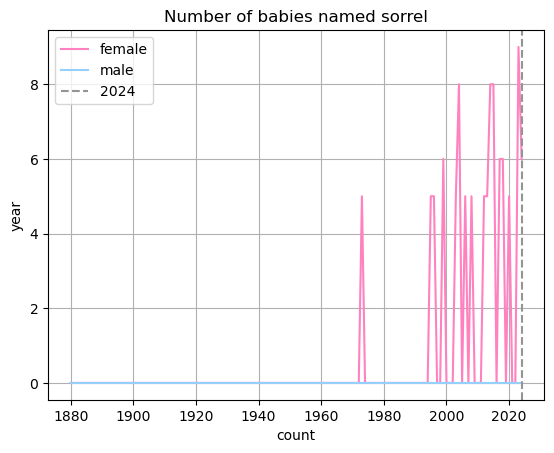

In 2024 there were 6 girls and 0 boys named sorrel.
In 2024 the ranks were 14992 for girls and -1 for boys
For girls the name increased from 1 to 6, a 500.00% increase over 1880 to 2024.
For boys the name decreased from 1 to 1, a 0.00% decrease over 1880 to 2024.
The name peaked in 2023 for girls with 9 and in 1880 with 0 for boys
There is a 100.00% difference between male and female, with more female.
There have been 102 girls named sorrel and 0 boys.


In [169]:
name = input("Enter the name: ").lower()
# min_y, max_y = fun.year_input()
min_y = min_data_year
max_y = max_data_year
# year = fun.single_year_input(min_y, max_y)
year = 2024
show = True
name_counts_f, ignore = fun.name_counts_years(name, "f", min_y, max_y)
name_counts_m, ignore = fun.name_counts_years(name, "m", min_y, max_y)

total_sum_f = int(sum(name_counts_f))
percent_change_f, initial_f, final_f = fun.calculate_percent_change(name_counts_f)
change_verb_f = "increase" if percent_change_f > 0 else "decrease"
percent_change_f = abs(percent_change_f)
total_sum_m = int(sum(name_counts_m))
percent_change_m, initial_m, final_m = fun.calculate_percent_change(name_counts_m)
change_verb_m = "increase" if percent_change_m > 0 else "decrease"
percent_change_m = abs(percent_change_m)
per_diff = fun.calculate_percent_diff(total_sum_f, total_sum_m)
peak_count_year_f, peak_count_f = fun.peak_year(name_counts_f, min_y)
peak_count_year_m, peak_count_m = fun.peak_year(name_counts_m, min_y)

plt.plot(range(min_y,max_y), name_counts_f, color = female_color, label = "female")
plt.plot(range(min_y,max_y), name_counts_m, color = male_color, label = "male")
fun.format_graph(f"Number of babies named {name}", year, True)
plt.show()

print(f"In {year} there were {int(name_counts_f[year - min_y])} girls and {int(name_counts_m[year - min_y])} boys named {name}.")
print(f"In {year} the ranks were {fun.get_rank(name, 'f', year)} for girls and {fun.get_rank(name, 'm', year)} for boys")
print(f"For girls the name {change_verb_f}d from {initial_f} to {final_f}, a {percent_change_f:.2f}% {change_verb_f} over {min_y} to {max_y - 1}.")
print(f"For boys the name {change_verb_m}d from {initial_m} to {final_m}, a {percent_change_m:.2f}% {change_verb_m} over {min_y} to {max_y - 1}.")
print(f"The name peaked in {peak_count_year_f} for girls with {peak_count_f} and in {peak_count_year_m} with {peak_count_m} for boys")
print(f"There is a {per_diff:.2f}% difference between male and female, with more {"female" if total_sum_f > total_sum_m else "male"}.")
print(f"There have been {total_sum_f} girls named {name} and {total_sum_m} boys.")

### Top Names in Year Range

In [ ]:
sex = input("Enter M for Male and F for Female: ").lower()
min_y, max_y = fun.year_input()
fun.top_names(sex, min_y, max_y)


0         f
1         f
2         f
3         f
4         f
         ..
115917    f
115918    f
115919    f
115920    f
115921    f
Name: sex, Length: 71646, dtype: object


,total,sex
name,,
mary,4139160,f
elizabeth,1681878,f
patricia,1573445,f
jennifer,1471191,f
linda,1454832,f
...,...,...
udelia,5,f
irvine,5,f
wrayanne,5,f


### Random Name Generator with Years

In [5]:
sex = input("Enter M for Male and F for Female: ").lower()
min_y, max_y = fun.gens_years_input(generation_starts)
current_df = fun.top_names(sex, min_y, max_y)
current_df = fun.narrow_top_popularity(current_df)
random_row = current_df.iloc[int(random.random() * len(current_df))]
print(f"Your random name is {random_row.name}, which was given to {random_row.total} {'girls' if random_row.sex == 'f' else 'boys'} from {min_y} to {max_y}")



The generations are: Missionary (0) 1880-1882, Lost (1) 1883-1900, Greatest (2) 1901-1927, Silent (3) 1928-1945, 
Boomer (4) 1946-1964, X (5) 1965-1980, Millennial (6) 1981-1996, Z (7) 1997-2009, Alpha (8) 2010-2024
The popularity options are: extremely popular (1), very popular (2), common (3), uncommon(4), 
	rare (5), ultra rare (6), ignore (7)
Your random name is amy, which was given to 11620 girls from 1901 to 1928
